In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from PIL import Image
import io
import requests
import imghdr


import matplotlib.pyplot as plt
import seaborn as sns

import os

from plotly.subplots import make_subplots
import plotly.graph_objects as go



In [5]:
url = 'https://ddragon.leagueoflegends.com/cdn/img/champion/splash/Ahri_0.jpg'
url2 = 'https://ddragon.leagueoflegends.com/cdn/img/champion/splash/ChoGath.jpg'

In [21]:
# Content-Type 헤더 확인: 또 다른 옵션은 HTTP 응답의 Content-Type 헤더를 확인하여
# URL이 이미지를 가리키는지 나타내는지 확인하는 것입니다. 
# 다음은 if 문을 사용하여 이를 수행하는 방법의 예입니다.

r = requests.get(url2)


if r.headers['Content-Type'].startswith('image'):
    print("This is an image URL.")
else:
    print("This is not an image URL.")

This is not an image URL.


In [ ]:
# 추천

In [396]:
df1.loc[df1['Name'] == hero.index[0],'Role' ] 

2    MID
3    TOP
Name: Role, dtype: object

In [340]:
last_df['Score']

0    65.300000
1    57.870000
2    49.999828
Name: Score, dtype: float64

In [339]:
last_df['index']

0       Akali
1       Akali
2    MID_mean
Name: index, dtype: object

In [380]:
fig = go.Figure(data=go.Scatter(x=[1, 2, 3], y=[4, 5, 6], mode='markers', marker_color='red', name='Data'))

# Update the layout to change the legend
fig.update_layout(legend=x=0.9, y=1.0)

fig.show()

SyntaxError: invalid syntax (719131575.py, line 4)

In [385]:
fig = make_subplots(rows=2, cols=2,subplot_titles=last_df.columns[1:])

fig.add_trace(
    go.Scatter(x=last_df['index'], y=last_df['Score'],name="Score",
        
        mode="markers+text",
        text=last_df['index'].values,
#         text=["Text A", "Text B", "Text C"],
        textposition="bottom center"
              
              ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=last_df['index'], y=last_df['Trend'],name='Trend',
              mode="markers+text",
        text=last_df['index'].values,
        textposition="bottom center"
              ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=last_df['index'], y=last_df['Win %'],name='Win %',
              mode="markers+text",
        text=last_df['index'].values,
        textposition="bottom center"),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=last_df['index'], y=last_df['KDA'],name='KDA',
              mode="markers+text",
        text=last_df['index'].values,
        textposition="bottom center"),
    row=2, col=2
)

fig.update_layout(height=600, width=800,legend_title="Legend", title_text="선택한 영웅과 같은 포지션의 평균 스탯을 비교합니다")


fig.update_xaxes(title_text="xaxis 1 title", row=1, col=1)
fig.update_xaxes(title_text="xaxis 2 title", range=[-1,2], row=1, col=2)
fig.update_xaxes(title_text="xaxis 3 title", showgrid=False, row=2, col=1)
fig.update_xaxes(title_text="xaxis 4 title", row=2, col=2) # 파라미터 type="log"

fig.update_yaxes(title_text="yaxis 1 title", row=1, col=1)
fig.update_yaxes(title_text="yaxis 2 title", range=[0, 10], row=1, col=2)
fig.update_yaxes(title_text="yaxis 3 title", showgrid=False, row=2, col=1)
fig.update_yaxes(title_text="yaxis 4 title", row=2, col=2)

fig.show()

## 

In [150]:
hero_selceted = 'Akali'
hero = df1.loc[ df1['Name'] == hero_selceted]
Role_group = df1.groupby('Role')[['Win %','Score','Trend','KDA']].agg(np.mean).reset_index()


In [151]:
choose_role = Role_group.loc[Role_group['Role'].values == hero['Role'].values , ]

C:\Users\5-10\AppData\Local\Temp\ipykernel_7808\3607952357.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  choose_role = Role_group.loc[Role_group['Role'].values == hero['Role'].values , ]


KeyError: 'False: boolean label can not be used without a boolean index'

In [ ]:
choose_role.set_index(hero['Role'].values+'_mean',inplace=True)
hero.set_index('Name',inplace=True)
hero.drop(['Class','Role','Tier','Role %','Pick %','Ban %'], axis=1 ,inplace=True)
choose_role.drop('Role',axis=1,inplace=True)
last_df = pd.concat([hero, choose_role], axis=0)

In [86]:
df.head(1)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97%,94.62%,4.43%,2.03%,1.97


In [6]:
df = pd.read_csv('data/League of Legends Champion Stats 12.1.csv', sep =';')
df.dropna(inplace=True)

In [20]:
df1.columns

Index(['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win %', 'Role %',
       'Pick %', 'Ban %', 'KDA'],
      dtype='object')

In [147]:
df1.loc[ df1['Name'] == 'Ahri']

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
1,Ahri,Mage,MID,A,53.21,-0.24,49.93,93.47,4.62,1.04,2.56


In [24]:
df1_mean = df1.mean(numeric_only=True)

In [32]:
df1_mean

Score     50.111299
Trend     -0.225584
Win %     50.039351
Role %    64.370606
Pick %     4.207273
Ban %      5.888442
KDA        2.332944
dtype: float64

In [87]:
Role_mean = df1.groupby('Role')['Win %'].mean()

In [88]:
Role_mean

Role
ADC        50.821852
JUNGLE     49.816957
MID        50.331379
SUPPORT    49.661220
TOP        49.830339
Name: Win %, dtype: float64

In [89]:
Role_group = df1.groupby('Role')[['Win %','Score','Trend','KDA']].agg(np.mean).reset_index()

In [92]:
hero

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
1,Ahri,Mage,MID,A,53.21,-0.24,49.93,93.47,4.62,1.04,2.56


In [91]:
Role_group

,Role,Win %,Score,Trend,KDA
0,ADC,50.821852,50.000370,-1.044074,2.386296
1,JUNGLE,49.816957,50.000652,-0.361957,2.636522
2,MID,50.331379,49.999828,0.290862,2.365517
3,SUPPORT,49.661220,50.000244,-0.814390,2.476098
4,TOP,49.830339,50.435085,0.156780,1.940339


In [105]:
hero['Role'].values

array(['MID'], dtype=object)

In [111]:
hero[['Score','Trend','Win %','KDA']]

,Score,Trend,Win %,KDA
1,53.21,-0.24,49.93,2.56


In [229]:
choose_role = Role_group.loc[Role_group['Role'].values == hero_val , ]

In [202]:
Role_group['Role']

0        ADC
1     JUNGLE
2        MID
3    SUPPORT
4        TOP
Name: Role, dtype: object

In [225]:
Role_group['Role'].values == hero_val

array([False, False, False, False,  True])

In [228]:
hero_val = hero['Role'].values[0]

In [403]:
df1.groupby(df1['Role'] == hero_val)['Score']

AttributeError: 'SeriesGroupBy' object has no attribute 'sort_value'

In [406]:
suggestion = df1.loc[ df1['Role'] == hero_val, ]

In [415]:
suggestion.sort_values('Score',ascending=False).head(5)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
224,Zed,Assassin,MID,God,90.50,-0.27,50.87,67.21,8.84,41.88,2.31
216,Yasuo,Fighter,MID,God,86.16,-0.04,49.56,71.44,11.77,24.41,1.74
202,Viktor,Mage,MID,God,81.46,-0.14,51.10,84.98,10.55,16.00,2.35
198,Vex,Mage,MID,God,76.85,10.71,50.76,84.52,9.15,19.25,2.48
219,Yone,Assassin,MID,S,74.16,-7.47,48.42,60.52,9.35,27.32,1.84


In [198]:
Role_group.set_index('Role')

,Win %,Score,Trend,KDA
Role,,,,
ADC,50.821852,50.000370,-1.044074,2.386296
JUNGLE,49.816957,50.000652,-0.361957,2.636522
MID,50.331379,49.999828,0.290862,2.365517
SUPPORT,49.661220,50.000244,-0.814390,2.476098
TOP,49.830339,50.435085,0.156780,1.940339


In [121]:
choose_role.set_index(hero['Role'].values+'_mean',inplace=True)

In [124]:
hero.set_index('Name',inplace=True)

In [134]:
hero.drop(['Class','Role','Tier','Role %','Pick %','Ban %'], axis=1 ,inplace=True)

,Score,Trend,Win %,KDA
Name,,,,
Ahri,53.21,-0.24,49.93,2.56


In [136]:
choose_role.drop('Role',axis=1,inplace=True)

C:\Users\5-10\AppData\Local\Temp\ipykernel_7808\2570989009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose_role.drop('Role',axis=1,inplace=True)


In [235]:
choose_role

,Role,Win %,Score,Trend,KDA
MID_mean,MID,50.331379,49.999828,0.290862,2.365517


In [145]:
last_df = pd.concat([hero, choose_role], axis=0)

In [330]:
last_df.reset_index(inplace=True)

In [331]:
last_df

,index,Score,Trend,Win %,KDA
0,Akali,65.300000,6.510000,48.590000,2.340000
1,Akali,57.870000,3.340000,48.570000,2.040000
2,MID_mean,49.999828,0.290862,50.331379,2.365517


In [328]:
choose_role

,Role,Win %,Score,Trend,KDA
2,MID,50.331379,49.999828,0.290862,2.365517


In [236]:
hero = df1.loc[ df1['Name'] == hero_selceted]
Role_group = df1.groupby('Role')[['Win %','Score','Trend','KDA']].agg(np.mean).reset_index()
hero_val = hero['Role'].values[0]
choose_role = Role_group.loc[Role_group['Role'].values == hero_val , ]
choose_role.set_index(choose_role['Role'].values+'_mean',inplace=True)
hero.set_index('Name',inplace=True)
hero.drop(['Class','Role','Tier','Role %','Pick %','Ban %'], axis=1 ,inplace=True)
choose_role.drop('Role',axis=1,inplace=True)
last_df = pd.concat([hero, choose_role], axis=0)

C:\Users\5-10\AppData\Local\Temp\ipykernel_7808\2476641614.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hero.drop(['Class','Role','Tier','Role %','Pick %','Ban %'], axis=1 ,inplace=True)
C:\Users\5-10\AppData\Local\Temp\ipykernel_7808\2476641614.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose_role.drop('Role',axis=1,inplace=True)


In [237]:
last_df

,Score,Trend,Win %,KDA
Akali,65.300000,6.510000,48.590000,2.340000
Akali,57.870000,3.340000,48.570000,2.040000
MID_mean,49.999828,0.290862,50.331379,2.365517


In [239]:
choose_role

,Role,Win %,Score,Trend,KDA
2,MID,50.331379,49.999828,0.290862,2.365517


In [247]:
len(hero)

2

In [284]:
df2 = pd.DataFrame({'value':[1,2],

                       'ind1':['a','c'],'ind2':['a','c']

                       })
df2.set_index('value')Like this you only get one row from the dataframe, but the row is a dataframe and the columns should be kept intact.


,ind1,ind2
value,,
1,a,a
2,c,c


In [283]:
df2.set_index('value')

,ind1
value,
1,a
2,c


In [321]:
hero.loc['Akali']

,Score,Trend,Win %,KDA
Name,,,,
Akali,65.30,6.51,48.59,2.34
Akali,57.87,3.34,48.57,2.04


In [326]:
if len(hero) > 1 :
    hero = pd.DataFrame(hero.iloc[0]).T

In [327]:
hero

,Score,Trend,Win %,KDA
Akali,65.3,6.51,48.59,2.34


In [48]:
df1.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97,94.62,4.43,2.03,1.97
1,Ahri,Mage,MID,A,53.21,-0.24,49.93,93.47,4.62,1.04,2.56
2,Akali,Assassin,MID,S,65.30,6.51,48.59,65.65,8.16,12.88,2.34
3,Akali,Assassin,TOP,A,57.87,3.34,48.57,34.06,4.24,12.88,2.04
4,Akshan,Marksman,MID,S,59.85,0.65,51.46,58.01,4.83,21.91,2.23


In [41]:
df1_mean = pd.DataFrame({'Score':[df1_mean[0]], 
            'Trend':[df1_mean[1]],
            'Win %':[df1_mean[2]],
            'Role %':[df1_mean[3]], 
           'Pick %':[df1_mean[4]],
            'Ban %':[df1_mean[5]], 
            'KDA':[df1_mean[6]]
                               } )

In [42]:
df1_mean

,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,50.111299,-0.225584,50.039351,64.370606,4.207273,5.888442,2.332944


In [ ]:
hero =df1[df1['Name'] == 'Ahri']

In [44]:
hero

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
1,Ahri,Mage,MID,A,53.21,-0.24,49.93,93.47,4.62,1.04,2.56


In [9]:
df1.mean().head(1)

C:\Users\5-10\AppData\Local\Temp\ipykernel_7808\3323518363.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean().head(1)


Score    50.111299
dtype: float64

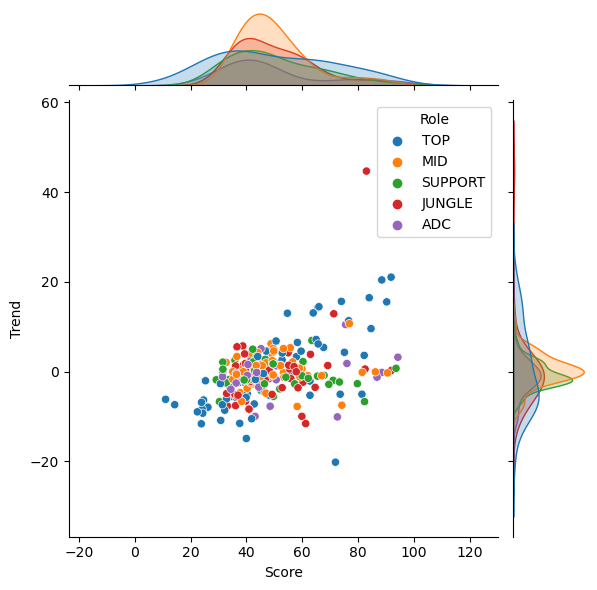

In [67]:
sns.jointplot(data = df1, x = 'Score', y = 'Trend',  hue  = 'Role' )

In [8]:
df1= df.copy()
df1['Win %']=df1['Win %'].str.replace('%', '').astype(float) 
df1['Role %']=df1['Role %'].str.replace('%', '').astype(float) 
df1['Pick %']=df1['Pick %'].str.replace('%', '').astype(float) 
df1['Ban %']=df1['Ban %'].str.replace('%', '').astype(float) 

C:\Users\aksl9\AppData\Local\Temp\ipykernel_28300\950385463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', center=0, fmt='.1f', linewidths=1, linecolor='white'),


Text(0.5, 1.0, 'Correlation Heatmap')

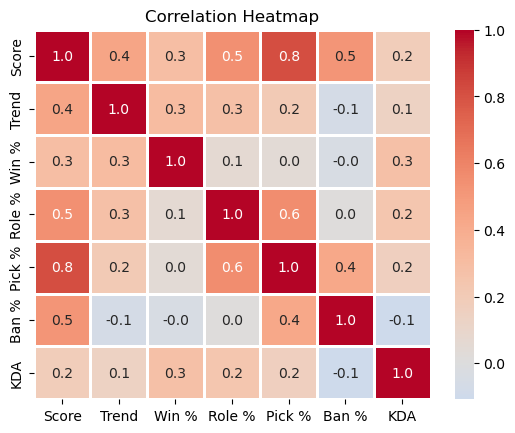

In [62]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', center=0, fmt='.1f', linewidths=1, linecolor='white'), 
plt.title('상관관계')


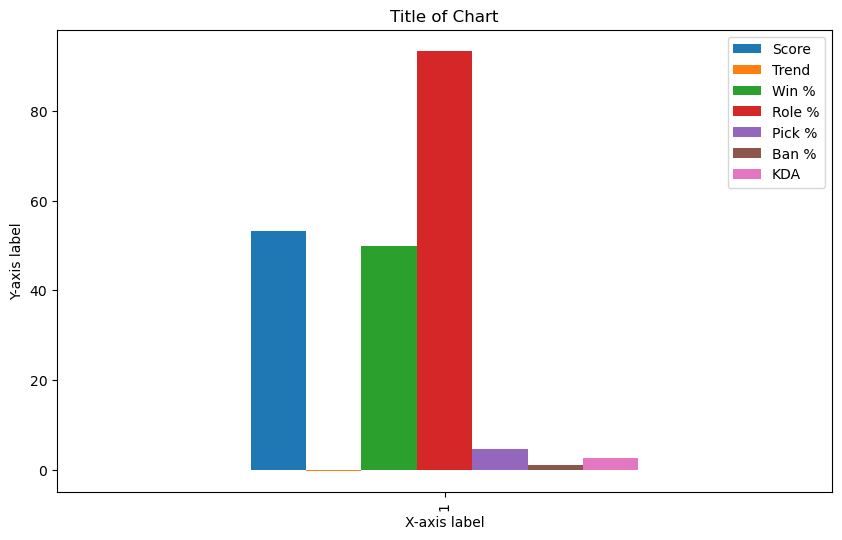

In [102]:


# Create the bar chart
hero.plot(kind='bar', figsize=(10, 6))

# Add a title and axis labels
plt.title('Title of Chart')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Show the chart
plt.show()

In [119]:
data1 = hero['Win %']
data2 = df1['Win %'].mean()

In [148]:
data1

,Win %
1,49.93


In [138]:
data1.shape[0]

1

In [142]:
data3 = data2['Win %']

In [149]:
data2

IndexError: index 1 is out of bounds for axis 0 with size 1

TypeError: Index(...) must be called with a collection of some kind, 1 was passed

In [123]:
data2.shape[1]

IndexError: tuple index out of range

In [120]:
new_data = pd.DataFrame(np.zeros((data1.shape[0], data2.shape[1])), columns=data2.columns)

IndexError: tuple index out of range

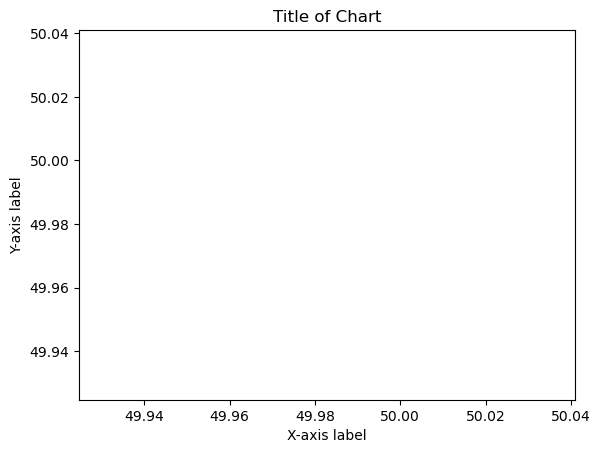

In [134]:
data1 = hero[['Win %']]
data2 = df1[['Win %']].mean()

# Create the bar chart
plt.plot(data1, data1, label='data1')
plt.plot(data2, data2, label='data2')

# Add a title and axis labels
plt.title('Title of Chart')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Show the chart
plt.show()

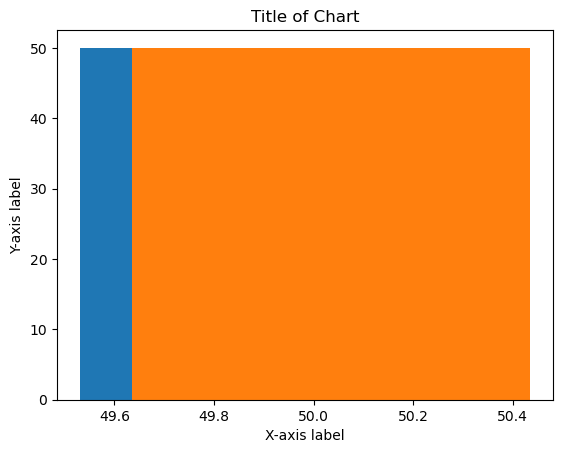

In [112]:
data1 = hero['Win %']
data2 = df1['Win %'].mean()

# Create the bar chart
plt.bar(data1, data1.values[0], label='data1')
plt.bar(data2, data2, label='data2')

# Add a title and axis labels
plt.title('Title of Chart')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Show the chart
plt.show()

In [105]:
df.columns

Index(['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win %', 'Role %',
       'Pick %', 'Ban %', 'KDA'],
      dtype='object')

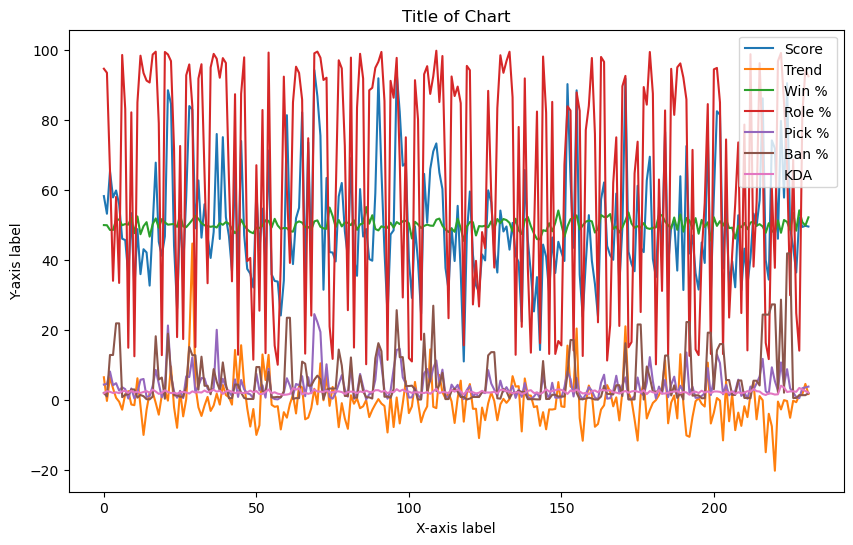

In [103]:
# Create the line chart
df1.plot(kind='line', figsize=(10, 6))

# Add a title and axis labels
plt.title('Title of Chart')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Show the chart
plt.show()

In [68]:
df1.head(1)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97,94.62,4.43,2.03,1.97


In [43]:
hero =df1[df1['Name'] == 'Ahri']


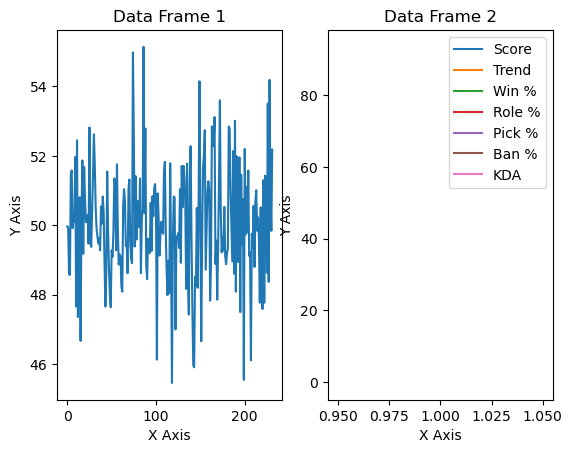

In [100]:
fig, ax = plt.subplots(1, 2)
df1['Win %'].plot(ax=ax[0])
hero.plot(ax=ax[1])
ax[0].set_title('Data Frame 1')
ax[0].set_xlabel('X Axis')
ax[0].set_ylabel('Y Axis')

ax[1].set_title('Data Frame 2')
ax[1].set_xlabel('X Axis')
ax[1].set_ylabel('Y Axis')
ax[1].legend()

plt.show()

<AxesSubplot: >

In [75]:
type(hero)

pandas.core.frame.DataFrame

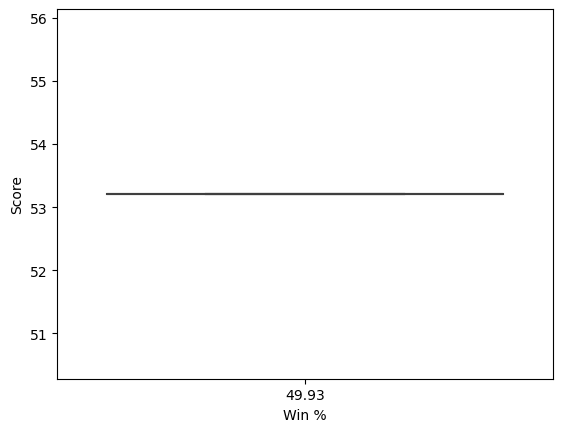

In [80]:
sns.boxplot(x= hero['Win %'], y=df1['Score'])

plt.show()

C:\Users\aksl9\AppData\Local\Temp\ipykernel_28300\2981995065.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr().max()


Score     1.0
Trend     1.0
Win %     1.0
Role %    1.0
Pick %    1.0
Ban %     1.0
KDA       1.0
dtype: float64

In [31]:
url = 'https://opgg-static.akamaized.net/meta/images/lol/champion/Morgana.png?image=c_crop,h_103,w_103,x_9,y_9/q_auto,f_webp,w_160&v=1671624147144'
response = requests.get(url)
image_data = response.content
image = Image.open(io.BytesIO(image_data))
image = image.resize((128, 128))
image

In [32]:
image = Image.open(io.BytesIO(image_data))

In [41]:
image = image.resize((128, 128))

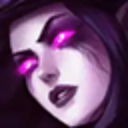

In [51]:
image

In [45]:
buffer = io.BytesIO()
image.save(buffer, format='png')

In [47]:
return {'resized_image': base64.b64encode(buffer.getvalue()).decode('utf-8')}

SyntaxError: 'return' outside function (1045707020.py, line 1)

In [25]:
def resize_image(inputs):
    image = Image.open(inputs['image'])
    image = image.resize((128, 128), resampling=Image.LANCZOS)
    return {'resized_image': image}

   

In [48]:
resize_image()

TypeError: resize_image() missing 1 required positional argument: 'inputs'

In [194]:
df.loc[ df['Name']== 'Arhi', ]

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA


In [138]:
df.columns

Index(['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win %', 'Role %',
       'Pick %', 'Ban %', 'KDA'],
      dtype='object')

In [118]:
os_list = os.listdir('data')

In [130]:
# 사용자 입력변수
os_list

['League of Legends Champion Stats 12.1.csv',
 'League of Legends Champion Stats 12.10.csv',
 'League of Legends Champion Stats 12.11.csv',
 'League of Legends Champion Stats 12.12.csv',
 'League of Legends Champion Stats 12.13.csv',
 'League of Legends Champion Stats 12.14.csv',
 'League of Legends Champion Stats 12.15.csv',
 'League of Legends Champion Stats 12.16.csv',
 'League of Legends Champion Stats 12.17.csv',
 'League of Legends Champion Stats 12.18.csv',
 'League of Legends Champion Stats 12.19.csv',
 'League of Legends Champion Stats 12.2.csv',
 'League of Legends Champion Stats 12.20.csv',
 'League of Legends Champion Stats 12.21.csv',
 'League of Legends Champion Stats 12.22.csv',
 'League of Legends Champion Stats 12.3.csv',
 'League of Legends Champion Stats 12.4.csv',
 'League of Legends Champion Stats 12.5.csv',
 'League of Legends Champion Stats 12.6.csv',
 'League of Legends Champion Stats 12.7.csv',
 'League of Legends Champion Stats 12.8.csv',
 'League of Legends C

In [131]:
df.columns

Index(['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win %', 'Role %',
       'Pick %', 'Ban %', 'KDA'],
      dtype='object')

In [133]:
df['Tier'].unique()

array(['A', 'S', 'B', 'C', 'D', 'God'], dtype=object)

In [136]:
df['Name'].unique()

array(['Aatrox', 'Ahri', 'Akali', 'Akshan', 'Alistar', 'Amumu', 'Anivia',
       'Annie', 'Aphelios', 'Ashe', 'Aurelion Sol', 'Azir', 'Bard',
       'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia',
       "Cho'Gath", 'Corki', 'Darius', 'Diana', 'Dr. Mundo', 'Draven',
       'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'Fiddlesticks', 'Fiora',
       'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves',
       'Gwen', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern',
       'Janna', 'Jarvan IV', 'Jax', 'Jayce', 'Jhin', 'Jinx', "Kai'Sa",
       'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle',
       'Kayn', 'Kennen', "Kha'Zix", 'Kindred', 'Kled', "Kog'Maw",
       'LeBlanc', 'Lee Sin', 'Leona', 'Lillia', 'Lissandra', 'Lucian',
       'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'Master Yi',
       'Miss Fortune', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus',
       'Nautilus', 'Neeko', 'Nidalee', 'Nocturne', 'Nunu', 'Olaf',
       'Orianna',

In [2]:
df = pd.read_csv('data/League of Legends Champion Stats 12.1.csv', sep =';')

In [55]:
df 1,2,3,6,7,8,9

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97%,94.62%,4.43%,2.03%,1.97
1,Ahri,Mage,MID,A,53.21,-0.24,49.93%,93.47%,4.62%,1.04%,2.56
2,Akali,Assassin,MID,S,65.30,6.51,48.59%,65.65%,8.16%,12.88%,2.34
3,Akali,Assassin,TOP,A,57.87,3.34,48.57%,34.06%,4.24%,12.88%,2.04
4,Akshan,Marksman,MID,S,59.85,0.65,51.46%,58.01%,4.83%,21.91%,2.23
...,...,...,...,...,...,...,...,...,...,...,...
227,Ziggs,Mage,MID,C,36.44,-0.60,48.37%,24.85%,0.86%,0.60%,2.36
228,Zilean,Support,MID,A,52.20,1.35,54.19%,14.12%,0.56%,1.40%,3.46
229,Zilean,Support,SUPPORT,A,49.44,1.68,50.83%,81.95%,3.38%,1.40%,3.03
230,Zoe,Mage,MID,A,49.77,4.62,49.84%,94.18%,3.62%,1.41%,2.58


In [3]:
df.shape

(232, 11)

In [4]:
df.columns

Index(['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win %', 'Role %',
       'Pick %', 'Ban %', 'KDA'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    232 non-null    object 
 1   Class   231 non-null    object 
 2   Role    232 non-null    object 
 3   Tier    232 non-null    object 
 4   Score   232 non-null    float64
 5   Trend   232 non-null    float64
 6   Win %   232 non-null    object 
 7   Role %  232 non-null    object 
 8   Pick %  232 non-null    object 
 9   Ban %   232 non-null    object 
 10  KDA     232 non-null    float64
dtypes: float64(3), object(8)
memory usage: 20.1+ KB


<AxesSubplot:>

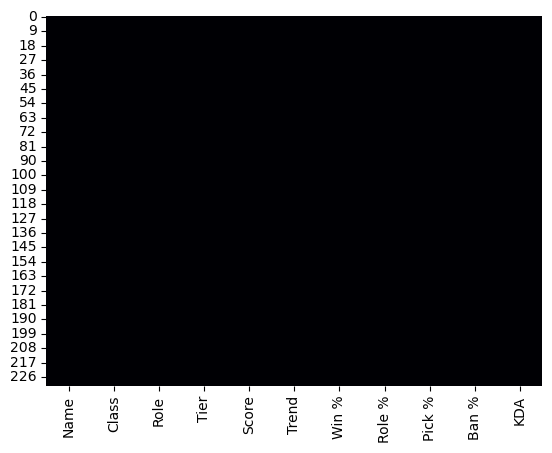

In [61]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

In [60]:
# 93번째 인덱스 Lillia 의 클래스가 누락됨을 확인하였다. 
# 번거로우니 드랍하였지만 살리는 방법에 대해 추후 연구.
df.dropna(inplace=True)

In [ ]:
# 특정 챔피언과 역할에 대한 '티어'를 예측해야 합니다. 
# 따라서 'Tier'를 대상 열로 만들고 나머지 열을 기능으로 만듭니다. 
# enoding하는 동안 너무 많은 고유 값을 생성하고 
# 챔피언 이름에서 특별한 것을 결정할 수 없기 때문에 
# '이름' 열을 삭제해야 합니다. 다른 열에 비해 이름 열의 가중치가 너무 적습니다.

In [63]:
X = df.drop(columns = ['Tier', 'Name'], axis = 1)
X

,Class,Role,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Fighter,TOP,58.25,6.52,49.97%,94.62%,4.43%,2.03%,1.97
1,Mage,MID,53.21,-0.24,49.93%,93.47%,4.62%,1.04%,2.56
2,Assassin,MID,65.30,6.51,48.59%,65.65%,8.16%,12.88%,2.34
3,Assassin,TOP,57.87,3.34,48.57%,34.06%,4.24%,12.88%,2.04
4,Marksman,MID,59.85,0.65,51.46%,58.01%,4.83%,21.91%,2.23
...,...,...,...,...,...,...,...,...,...
227,Mage,MID,36.44,-0.60,48.37%,24.85%,0.86%,0.60%,2.36
228,Support,MID,52.20,1.35,54.19%,14.12%,0.56%,1.40%,3.46
229,Support,SUPPORT,49.44,1.68,50.83%,81.95%,3.38%,1.40%,3.03
230,Mage,MID,49.77,4.62,49.84%,94.18%,3.62%,1.41%,2.58


In [65]:
y = df['Tier']

In [66]:
a = X.iloc[:,[0,1,4,5,6,7]]
b = X.iloc[:,[2,3,8]]

In [ ]:
# Label Encoder를 사용한 인코딩
# 문자열 데이터에 레이블 인코딩을 사용하여 숫자 데이터로 변환할 수 있습니다.

In [164]:
df1_enc = df1.iloc[:,[1,2,3]]
for col in df1_enc.columns:
    lb = LabelEncoder()
    df1_enc[col] = lb.fit_transform(df1_enc[col].values)
    for i, label in enumerate(lb.classes_):
        print(col,'->', i, '->', label)
df1_enc

Class -> 0 -> Assassin
Class -> 1 -> Fighter
Class -> 2 -> Mage
Class -> 3 -> Marksman
Class -> 4 -> Support
Class -> 5 -> Tank
Role -> 0 -> ADC
Role -> 1 -> JUNGLE
Role -> 2 -> MID
Role -> 3 -> SUPPORT
Role -> 4 -> TOP
Tier -> 0 -> A
Tier -> 1 -> B
Tier -> 2 -> C
Tier -> 3 -> D
Tier -> 4 -> God
Tier -> 5 -> S


C:\Users\5-10\AppData\Local\Temp\ipykernel_14760\1628472084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_enc[col] = lb.fit_transform(df1_enc[col].values)


,Class,Role,Tier
0,1,4,0
1,2,2,0
2,0,2,5
3,0,4,0
4,3,2,5
...,...,...,...
227,2,2,2
228,4,2,0
229,4,3,0
230,2,2,0


In [155]:
df1_enc

,Class,Role,Tier
0,1,4,0
1,2,2,0
2,0,2,5
3,0,4,0
4,3,2,5
...,...,...,...
227,2,2,2
228,4,2,0
229,4,3,0
230,2,2,0


In [161]:
a_enc = a.copy()
for col in a.columns:
    lb = LabelEncoder()
    a_enc[col] = lb.fit_transform(a[col].values)
    
a_enc

,Class,Role,Win %,Role %,Pick %,Ban %
0,1,4,99,179,145,87
1,2,2,97,174,149,44
2,0,2,33,90,190,73
3,0,4,32,61,140,73
4,3,2,153,80,153,109
...,...,...,...,...,...,...
227,2,2,27,49,32,27
228,4,2,187,23,20,51
229,4,3,132,114,122,51
230,2,2,92,175,125,52


In [70]:
# 인코딩된 두 데이터 프레임을 합칩니다.

In [71]:
X = pd.concat([b, a_enc], axis = 1)
X

,Score,Trend,KDA,Class,Role,Win %,Role %,Pick %,Ban %
0,58.25,6.52,1.97,1,4,99,179,145,87
1,53.21,-0.24,2.56,2,2,97,174,149,44
2,65.30,6.51,2.34,0,2,33,90,190,73
3,57.87,3.34,2.04,0,4,32,61,140,73
4,59.85,0.65,2.23,3,2,153,80,153,109
...,...,...,...,...,...,...,...,...,...
227,36.44,-0.60,2.36,2,2,27,49,32,27
228,52.20,1.35,3.46,4,2,187,23,20,51
229,49.44,1.68,3.03,4,3,132,114,122,51
230,49.77,4.62,2.58,2,2,92,175,125,52


In [72]:
# 수치 데이터에서 패턴 탐색 및 찾기

In [73]:
X.describe()

,Score,Trend,KDA,Class,Role,Win %,Role %,Pick %,Ban %
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,50.111299,-0.225584,2.332944,2.116883,2.255411,95.623377,112.346320,99.753247,73.956710
std,16.481046,6.426109,0.415500,1.497598,1.344766,53.248647,65.609725,58.432902,45.216271
min,11.030000,-20.170000,1.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.010000,-3.445000,2.040000,1.000000,1.000000,52.500000,55.500000,48.500000,35.500000
50%,46.690000,-0.810000,2.300000,2.000000,2.000000,95.000000,112.000000,100.000000,73.000000
75%,59.355000,2.110000,2.545000,3.000000,4.000000,141.500000,168.500000,149.500000,112.500000
max,94.230000,44.710000,4.110000,5.000000,4.000000,189.000000,225.000000,202.000000,155.000000


In [74]:
# 모든 기능에 대한 상관관계를 확인하기 위해 히트맵을 그려봅시다.

In [75]:
corr = X.corr()
corr.style.background_gradient(cmap ='coolwarm')

,Score,Trend,KDA,Class,Role,Win %,Role %,Pick %,Ban %
Score,1.000000,0.432005,0.184177,-0.011983,0.008776,0.307761,0.519179,0.621007,0.470573
Trend,0.432005,1.000000,0.135976,0.010337,0.035948,0.323138,0.242369,0.207057,0.098806
KDA,0.184177,0.135976,1.000000,0.306115,-0.445900,0.253520,0.273264,0.023667,-0.099700
Class,-0.011983,0.010337,0.306115,1.000000,0.043402,0.182711,0.164416,-0.045975,-0.171422
Role,0.008776,0.035948,-0.445900,0.043402,1.000000,-0.102114,-0.131398,-0.022931,-0.024272
Win %,0.307761,0.323138,0.253520,0.182711,-0.102114,1.000000,0.100963,0.072620,0.070457
Role %,0.519179,0.242369,0.273264,0.164416,-0.131398,0.100963,1.000000,0.631918,0.111568
Pick %,0.621007,0.207057,0.023667,-0.045975,-0.022931,0.072620,0.631918,1.000000,0.449036
Ban %,0.470573,0.098806,-0.099700,-0.171422,-0.024272,0.070457,0.111568,0.449036,1.000000


여기에서 Score가 Role 및 Pick%와 높은 상관관계가 있음을 알 수 있습니다.   
 또한 KDA와 Role 사이에는 상당한 양의 음의 상관관계가 있습니다.   
 Role과 Pick% 사이에는 높은 상관관계가 있습니다.  

In [ ]:
# 주어진 데이터를 교육 및 테스트 데이터 세트로 분할하여 모델을 평가합니다. 
# 이는 train_test_split이라는 내장 함수를 사용하여 수행됩니다.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

In [77]:
# 모델 평가 기능함수

In [78]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(6,6)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')

In [79]:
# KNN 모델 여기서 우리는 'k' 즉 n_neighbors에 대한 최상의 값을 결정해야 합니다. 
# for 루프를 작성하여 이를 수행할 수 있습니다.

In [80]:
scores = []
for k in range(2,30):
    knn = KNeighborsClassifier(k).fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
print(scores, end = ' ')

[0.425531914893617, 0.425531914893617, 0.425531914893617, 0.44680851063829785, 0.46808510638297873, 0.425531914893617, 0.425531914893617, 0.44680851063829785, 0.46808510638297873, 0.40425531914893614, 0.425531914893617, 0.425531914893617, 0.40425531914893614, 0.40425531914893614, 0.425531914893617, 0.44680851063829785, 0.40425531914893614, 0.40425531914893614, 0.44680851063829785, 0.40425531914893614, 0.425531914893617, 0.44680851063829785, 0.3617021276595745, 0.3829787234042553, 0.3829787234042553, 0.3617021276595745, 0.40425531914893614, 0.3404255319148936] 

In [81]:
final_knn = KNeighborsClassifier(n_neighbors = 6, metric = 'manhattan').fit(X_train, y_train)
final_knn.score(X_train, y_train)

0.717391304347826

In [95]:
final_knn.score(X_test, y_test)

0.5106382978723404

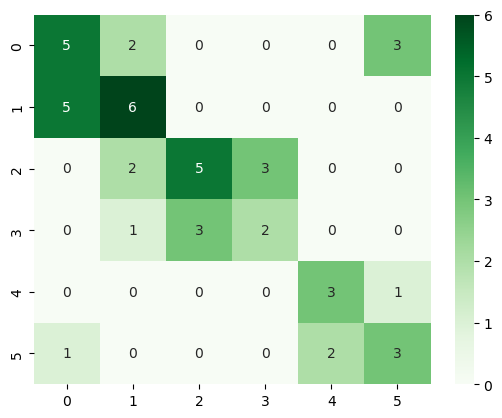

In [82]:
model_evaluation(final_knn)

대각선 값은 올바른 예측 값이고    
대각선 이외의 블록은 잘못된 예측 값입니다.

In [84]:
# SVM 분류기 모델 SVC에서는 C에 대한 올바른 값을 결정해야 합니다.
# for 루프를 작성하여 이를 수행합니다.

In [85]:
scores1 = []
for f in range(5):
    c = 10**f
    svm = SVC(C = c).fit(X_train, y_train)
    scores1.append(svm.score(X_test, y_test))
print(scores1, end = ' ')

[0.5106382978723404, 0.5957446808510638, 0.6382978723404256, 0.6382978723404256, 0.6382978723404256] 

In [86]:
svm_final = SVC(C = 10).fit(X_train, y_train)
svm_final.score(X_train, y_train)

0.8532608695652174

교육 점수는 0.595이고 테스트 점수는 0.853입니다.

In [90]:
svm_final.score(X_test, y_test)

0.5957446808510638

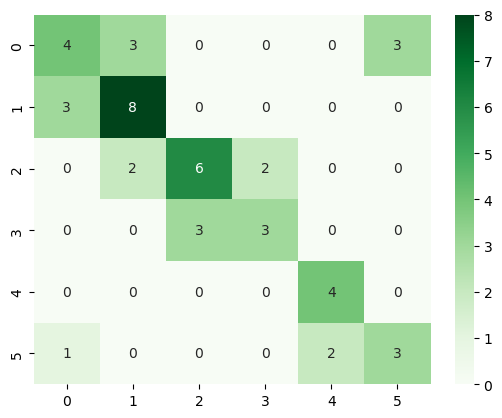

In [91]:
model_evaluation(svm_final)

In [ ]:
# 가우시안 나이브 베이즈 ( GaussianNB )
# 대상 변수의 다양한 클래스에 대한 확률을 계산하고 
# 가장 높은 확률을 기반으로 예측을 제공합니다.

In [92]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [93]:
nb.score(X_train, y_train), nb.score(X_test, y_test)

(0.8913043478260869, 0.8085106382978723)

여기서 우리는 0.891 훈련 정확도와 0.808 테스트 정확도를 얻었습니다.

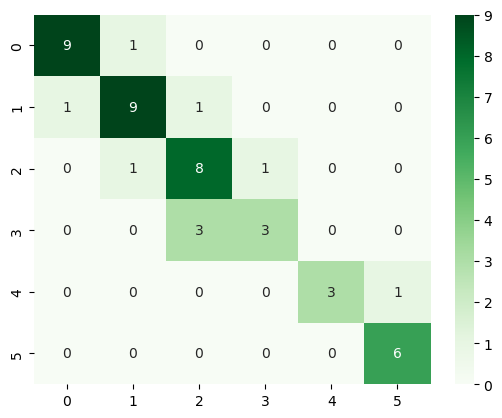

In [94]:
model_evaluation(nb)

결론: Naive Bayes의 정확도는 주어진 데이터 세트에 대해 
KNN 및 SVM보다 훨씬 높습니다

In [114]:
X_test.head(2)

,Score,Trend,KDA,Class,Role,Win %,Role %,Pick %,Ban %
201,82.48,0.59,2.46,0,1,85,181,75,76
116,55.47,0.61,3.04,5,1,162,152,141,96


In [115]:
y_test.head(2)

201    God
116      A
Name: Tier, dtype: object

In [116]:
df.head(2)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97%,94.62%,4.43%,2.03%,1.97
1,Ahri,Mage,MID,A,53.21,-0.24,49.93%,93.47%,4.62%,1.04%,2.56
